# Visão - Trabalho 1

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pprint
%matplotlib inline  

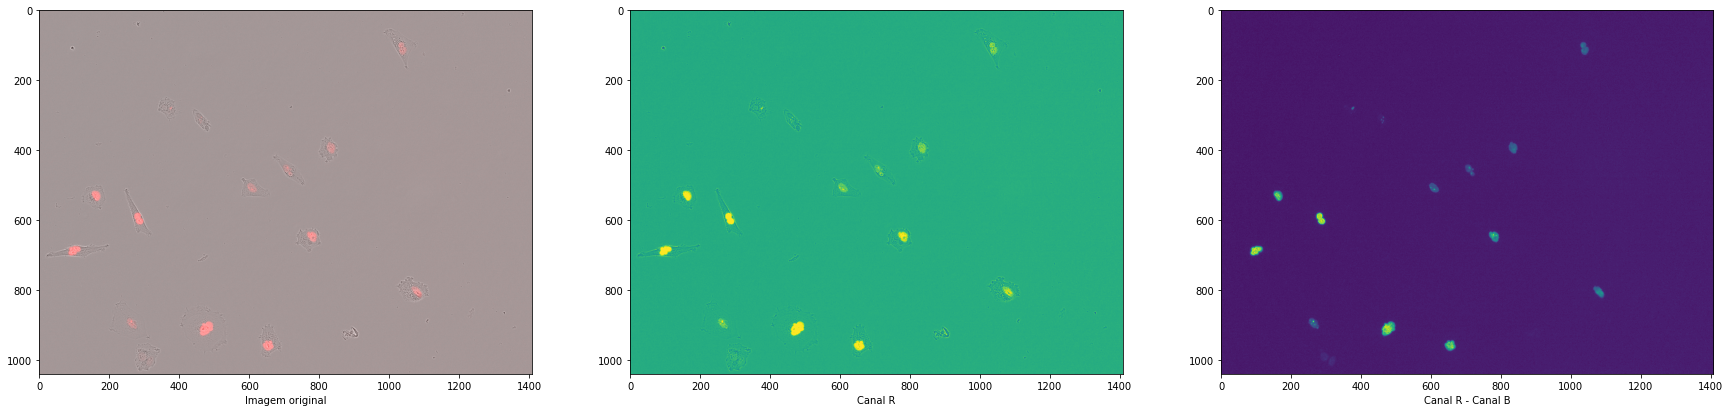

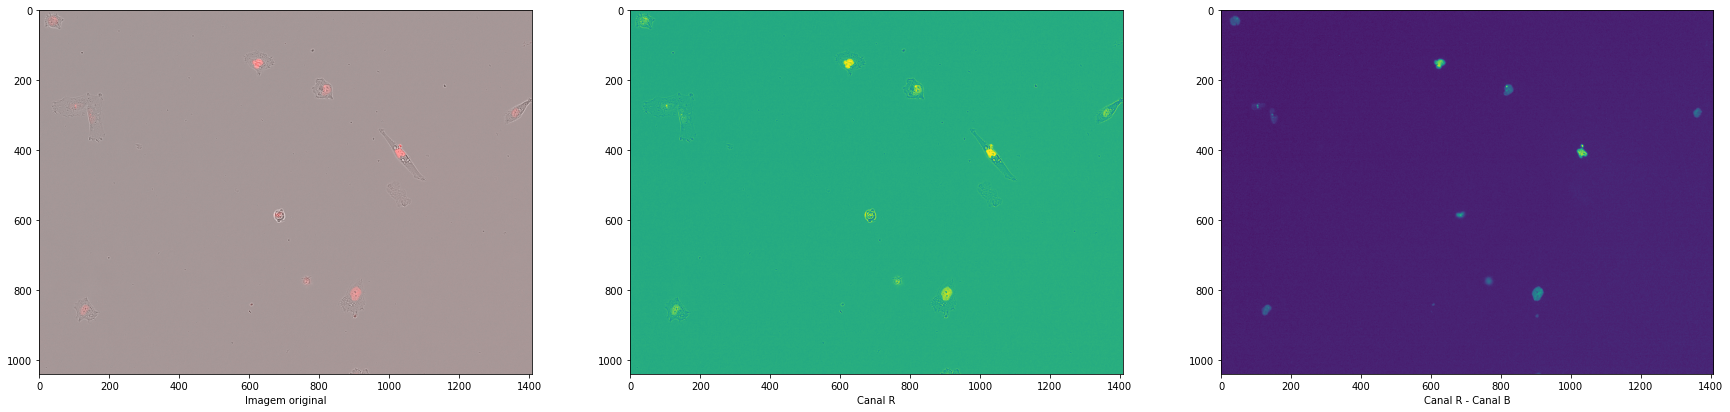

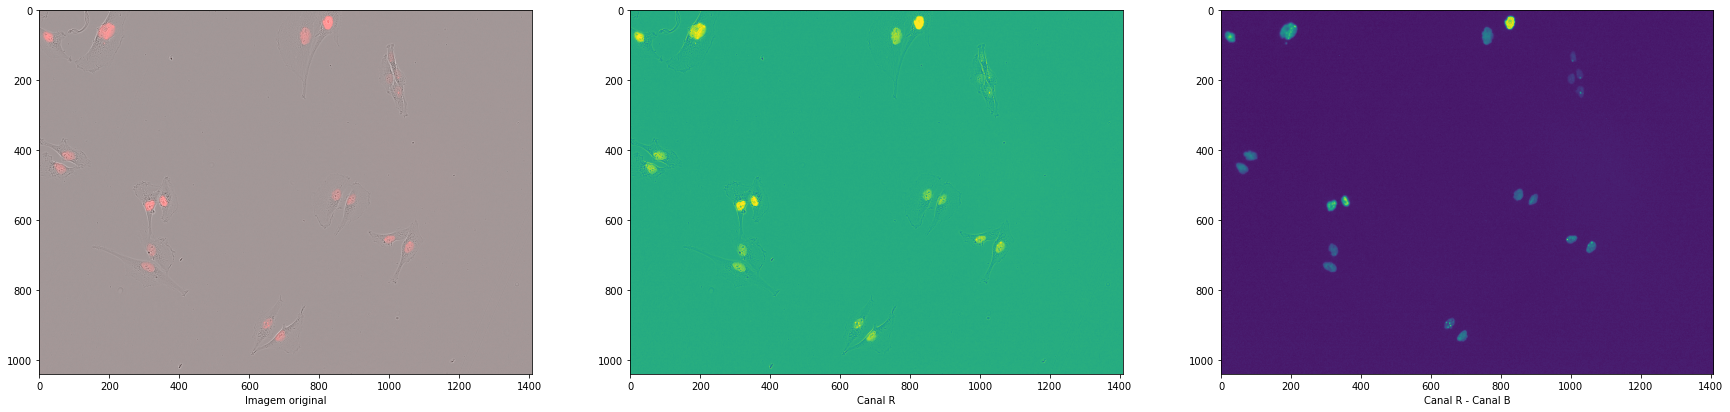

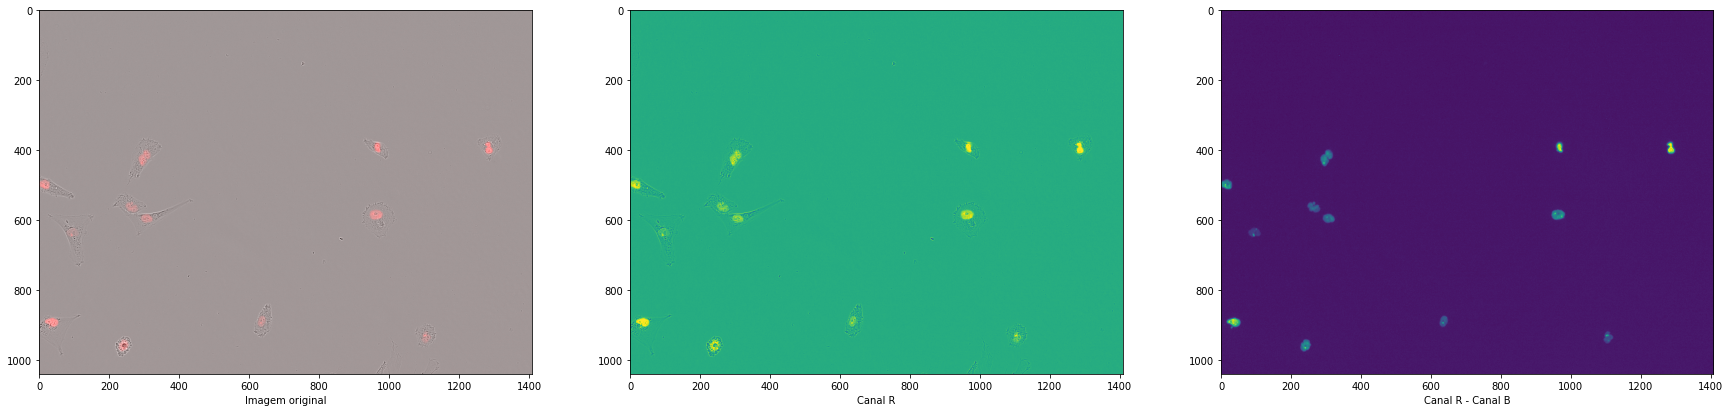

In [22]:

def linear_stretching(img):
    img = cv2.normalize(img, None, alpha=0, beta=1.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img = np.clip(img, 0, 1)
    img = (255*img).astype(np.uint8)
    return img

def plot_channels(img_filename):
    img = cv2.imread(img_filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_red = img[:,:,0]
    img_blue = img[:,:,2]

    img_red_minus_blue = img_red - img_blue

    fig = plt.figure(figsize=(30,30))
    
    ax = fig.add_subplot(131)
    ax.set_xlabel("Imagem original")
    ax.imshow(linear_stretching(img))

    ax = fig.add_subplot(132)
    ax.set_xlabel("Canal R")
    ax.imshow(linear_stretching(img_red))

    ax = fig.add_subplot(133)
    ax.set_xlabel("Canal R - Canal B")
    ax.imshow(linear_stretching(img_red_minus_blue))

    plt.title = img_filename
    plt.show()

for filename in ['composite_01.png', 'composite_02.png', 'composite_03.png', 'composite_04.png']:
    plot_channels(filename)

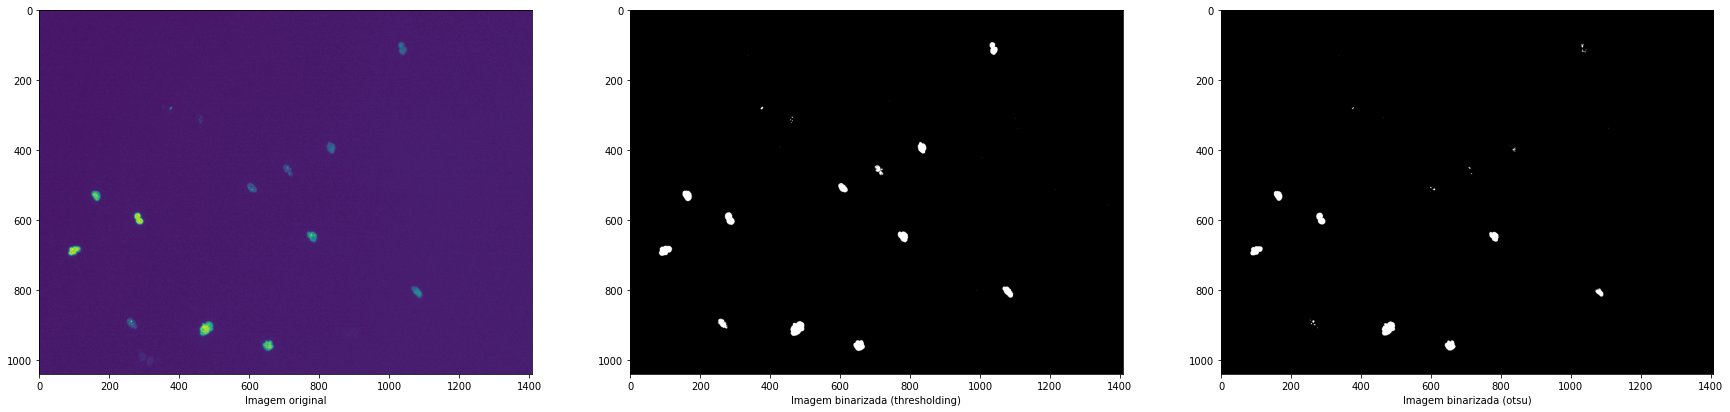

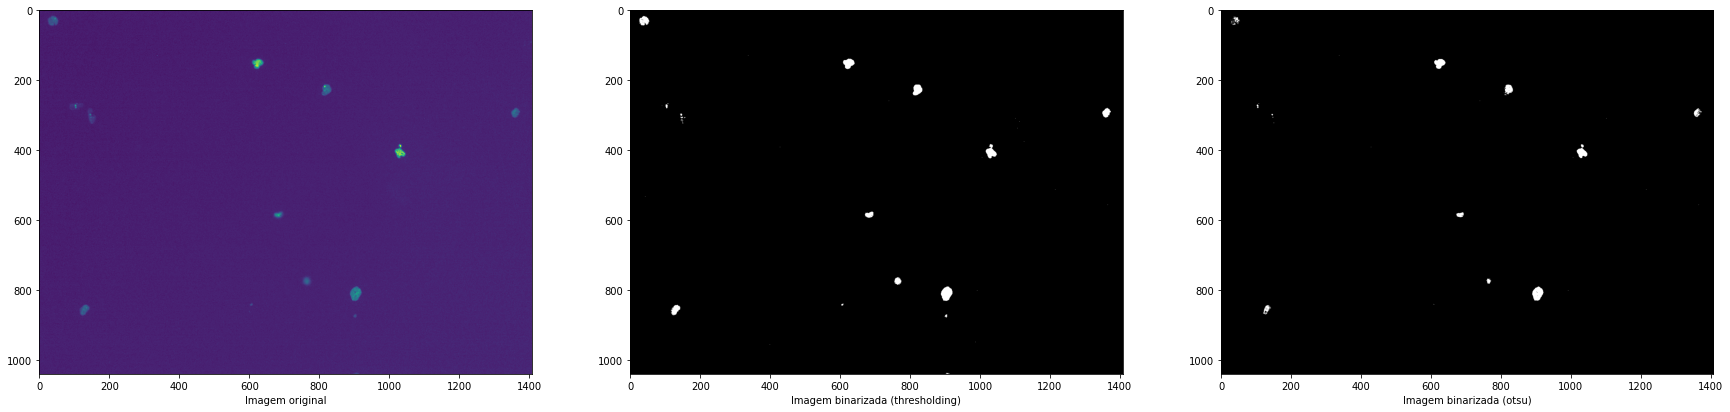

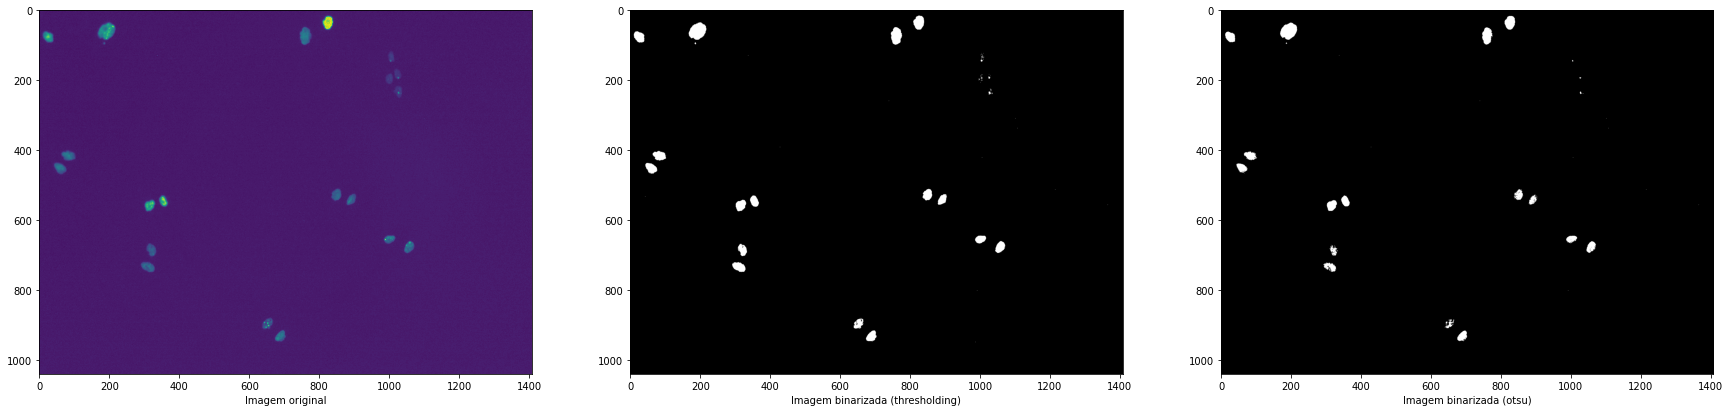

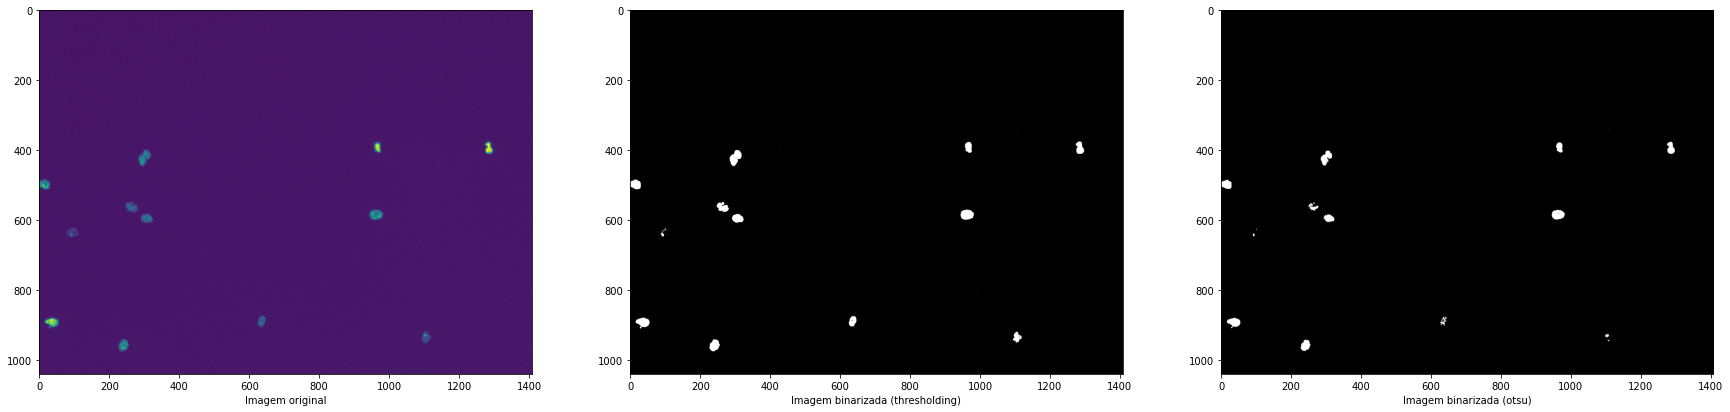

In [27]:
# def auto_thresholding(img, delta_t = 0.01):
#     t = img.mean()
#     t_old = t + 2*delta_t

#     while abs(t - t_old) > delta_t:
#         mean_r1 = np.average(img, weights=(img < t))
#         mean_r2 = np.average(img, weights=(img >= t))

#         t_old = t
#         t = 0.5 * (mean_r1 + mean_r2)

#     return t

# def thresholding(img):
#     t = auto_thresholding(img)
    
#     img_bin = img.copy()
#     h = img.shape[0]
#     w = img.shape[1]
#     for y in range(0, h):
#         for x in range(0, w):
#             img_bin[y, x] = 255 if img[y, x] >= t else 0
    
#     return img_bin

def thresholding(img):
    _, img_bin = cv2.threshold(img_red_minus_blue,50,255, cv2.THRESH_BINARY)
    return img_bin

def otsu(img):
    _, img_bin = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    return img_bin

for filename in ['composite_01.png', 'composite_02.png', 'composite_03.png', 'composite_04.png']:
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_red = img[:,:,0]
    img_blue = img[:,:,2]

    img_red_minus_blue = img_red - img_blue
    img_red_minus_blue = linear_stretching(img_red_minus_blue)

    img_red_minus_blue_thresh = thresholding(img_red_minus_blue)
    img_red_minus_blue_otsu = otsu(img_red_minus_blue)
    
    fig = plt.figure(figsize=(30,30))
    
    ax = fig.add_subplot(131)
    ax.set_xlabel("Imagem original")
    ax.imshow(img_red_minus_blue)

    ax = fig.add_subplot(132)
    ax.set_xlabel("Imagem binarizada (thresholding)")
    ax.imshow(img_red_minus_blue_thresh,'gray', vmin=0, vmax=255)

    ax = fig.add_subplot(133)
    ax.set_xlabel("Imagem binarizada (otsu)")
    ax.imshow(img_red_minus_blue_otsu,'gray', vmin=0, vmax=255)


    plt.show()


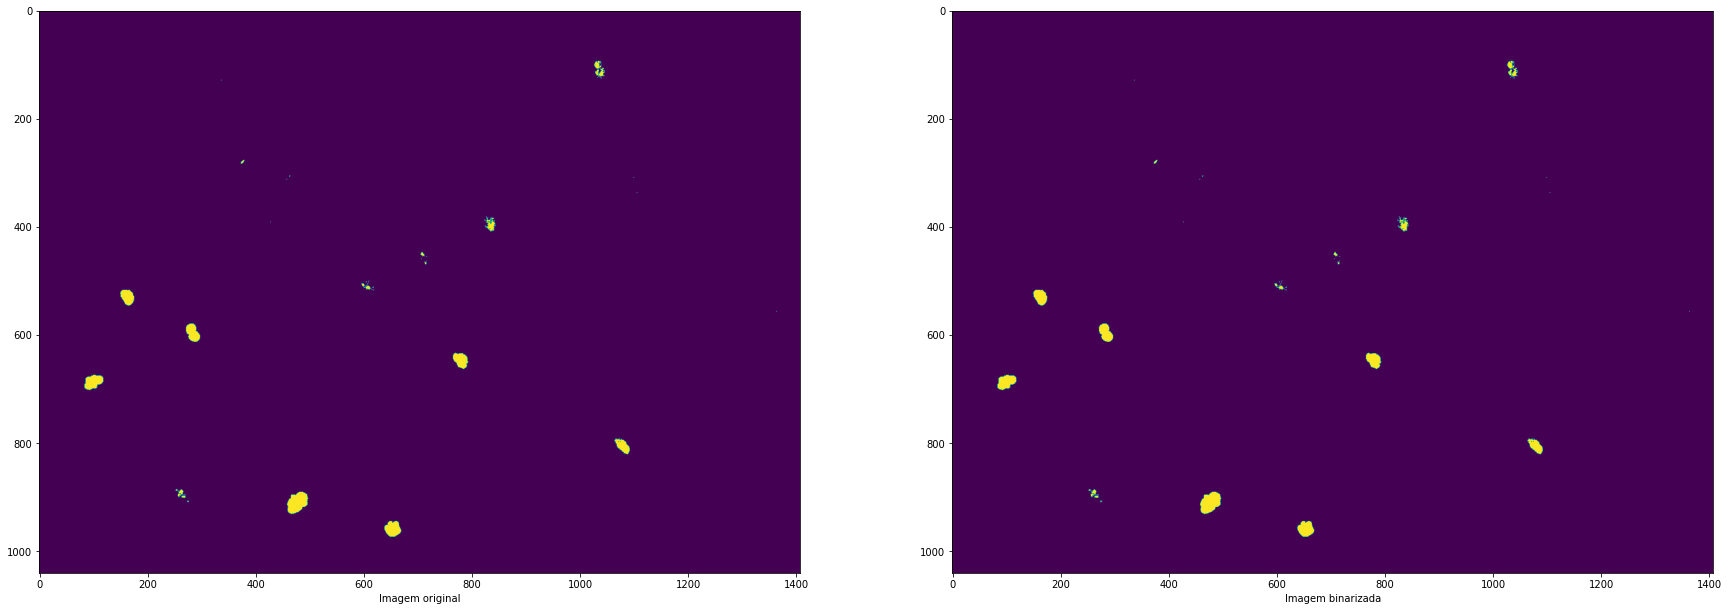

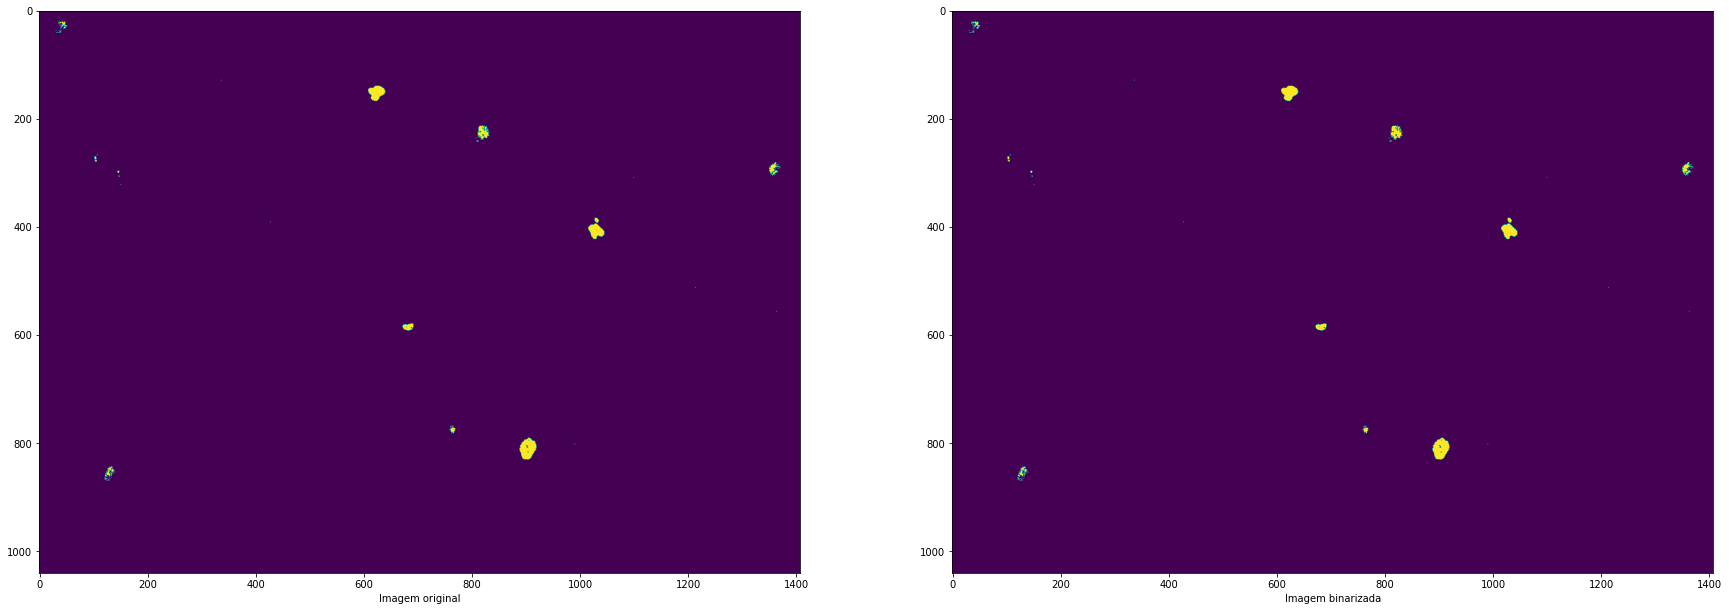

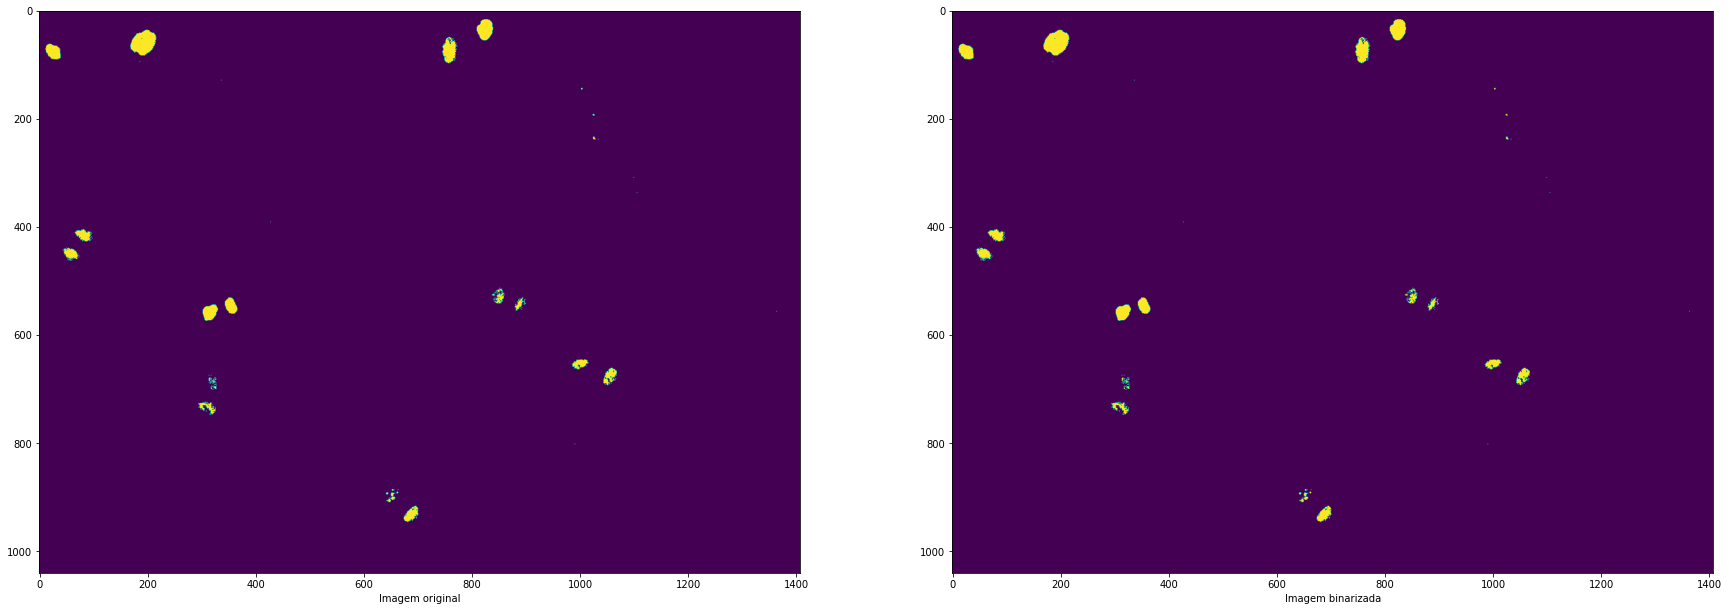

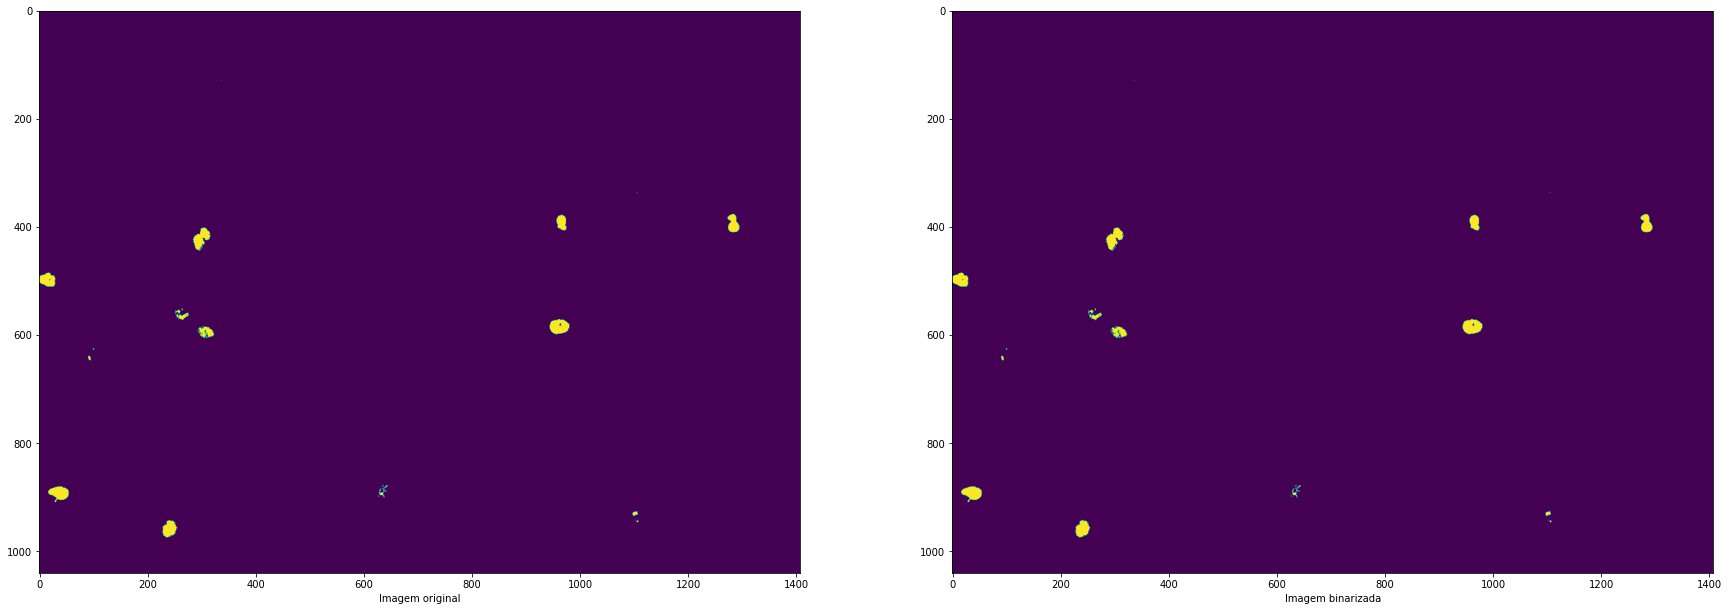

In [65]:
for filename in ['composite_01.png', 'composite_02.png', 'composite_03.png', 'composite_04.png']:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_red = img[:,:,0]
    img_blue = img[:,:,2]

    img_red_minus_blue = img_red - img_blue
    img_red_minus_blue = normalize(img_red_minus_blue)

    _, img_red_minus_blue_bin = cv2.threshold(img_red_minus_blue,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    fig = plt.figure(figsize=(30,30))
    
    ax = fig.add_subplot(121)
    ax.set_xlabel("Imagem original")
    ax.imshow(img_red_minus_blue)

    ax = fig.add_subplot(122)
    ax.set_xlabel("Imagem binarizada")
    ax.imshow(img_red_minus_blue_bin)

    plt.show()
